In [2]:
import os
import numpy as np 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten,BatchNormalization, Dense
import cv2 
from imgaug import augmenters  
from sklearn.model_selection import train_test_split
import pandas as pd
import random 
import ntpath
from sklearn.utils import shuffle
import matplotlib.image as mpimg
from keras.callbacks import LearningRateScheduler

In [3]:
# folder directory
folderDir = 'track/'

# all of the columns that will be picked 
columns = ["left", "right", "center", "steering", "throttle", "reverse", "speed"]

# get the data from driving_log.csv
data = pd.read_csv(os.path.join(folderDir, 'driving_log.csv'), names=columns)

data.head()

,left,right,center,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_201...,C:\Users\Amer\Desktop\new_track\IMG\left_2018_...,C:\Users\Amer\Desktop\new_track\IMG\right_2018...,0.0,0.0,0.0,0.615438


In [4]:
temp = data.to_numpy()
def getImageName(path) :
    _, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(getImageName)
data['left'] = data['left'].apply(getImageName)
data['right'] = data['right'].apply(getImageName)
data

,left,right,center,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
...,...,...,...,...,...,...,...
4048,center_2018_07_16_17_16_31_474.jpg,left_2018_07_16_17_16_31_474.jpg,right_2018_07_16_17_16_31_474.jpg,0.0,0.0,0.0,26.017680
4049,center_2018_07_16_17_16_31_544.jpg,left_2018_07_16_17_16_31_544.jpg,right_2018_07_16_17_16_31_544.jpg,0.0,0.0,0.0,25.808640
4050,center_2018_07_16_17_16_31_617.jpg,left_2018_07_16_17_16_31_617.jpg,right_2018_07_16_17_16_31_617.jpg,0.0,0.0,0.0,25.652960
4051,center_2018_07_16_17_16_31_685.jpg,left_2018_07_16_17_16_31_685.jpg,right_2018_07_16_17_16_31_685.jpg,0.0,0.0,0.0,25.446850


In [5]:
num_bins = 25
# num_bins -> make 25 different range
hist, bins = np.histogram(data['steering'], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [6]:
# add the center zero
center = (bins[1:] + bins[:-1]) * 0.5
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

<BarContainer object of 25 artists>

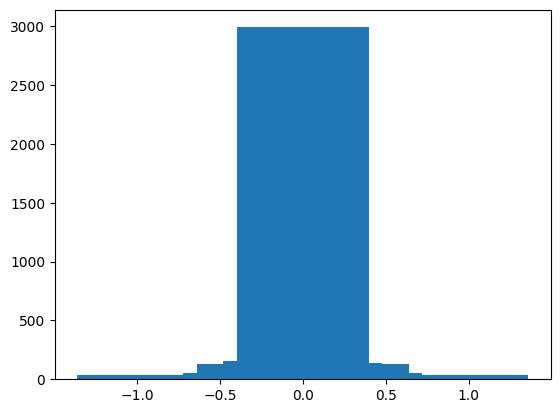

In [7]:
import matplotlib.pyplot as plt
plt.bar(center, hist)

## Make it balance

In [8]:
removed_indexs = []
for i in range(len(center) - 1) :
    indexsBin = []
    for j in range(len(data["steering"])) :
        if data["steering"][j] >= center[i] and data["steering"][j] < center[i+1] :
            indexsBin.append(j)
    indexsBin = shuffle(indexsBin)
    indexsBin = indexsBin[200:]
    removed_indexs.extend(indexsBin)

data.drop(data.index[removed_indexs], inplace=True)



In [9]:
data.shape

(1213, 7)

In [10]:
num_bins = 25
# num_bins -> make 25 different range
hist, bins = np.histogram(data['steering'], num_bins)
print(bins)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [11]:
center = (bins[1:] + bins[:-1]) * 0.5
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

<BarContainer object of 25 artists>

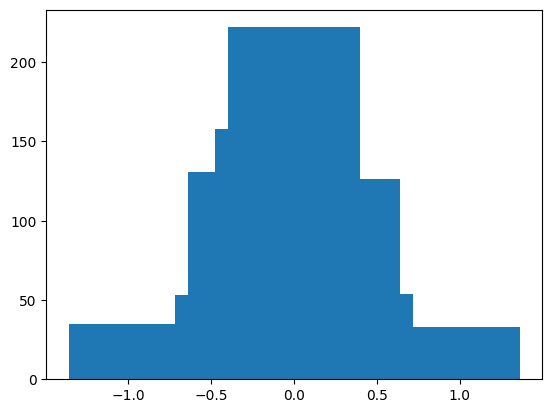

In [12]:
import matplotlib.pyplot as plt
plt.bar(center, hist)

## Split dataset

In [13]:
def load_img_steering(datadir, dt) :
    image_path = []
    steerings = []
    for i in range(len(data)) :
        indexed = dt.iloc[i] # it's same with array[i], but remember data is dataframe
        center, left, right,steering = indexed[0], indexed[1], indexed[2], indexed[3]
        # remember, the center or image name has been truncated before
        # so you need to transform the image name into its directory path
        image_path.append(os.path.join(datadir, center.strip()))
        steerings.append(float(steering))
    image_path = np.asarray(image_path)
    steerings = np.asanyarray(steerings)
    return image_path, steerings

image_paths, steerings = load_img_steering(folderDir + "IMG", data)
# image center -> data (training data)
# steerings -> output (target)
X_train, X_test, y_train, y_test = train_test_split(image_paths, steerings, test_size=0.2)

In [14]:
y_train.shape

(970,)

In [15]:
y_test.shape

(243,)

Text(0.5, 1.0, 'Testing')

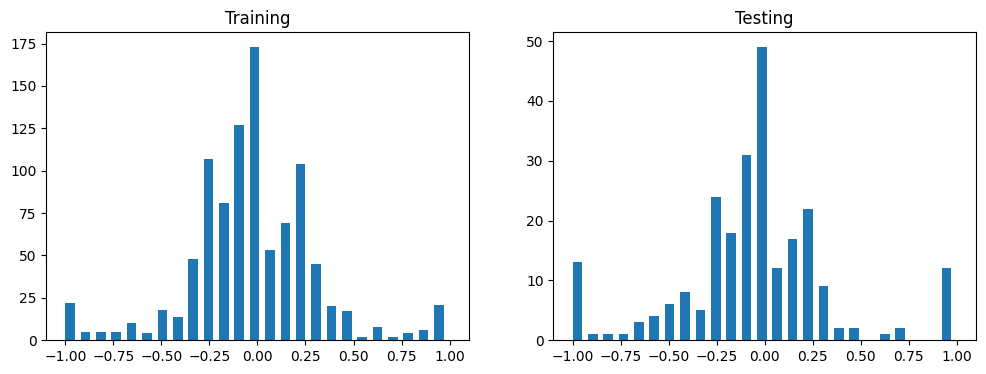

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05)
axes[0].set_title("Training")
axes[1].hist(y_test, bins=num_bins, width=0.05)
axes[1].set_title("Testing")

## Image Augmentation

In [17]:
def zoom(image) :
    zoom = augmenters.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

Text(0.5, 1.0, 'Zoomed Image')

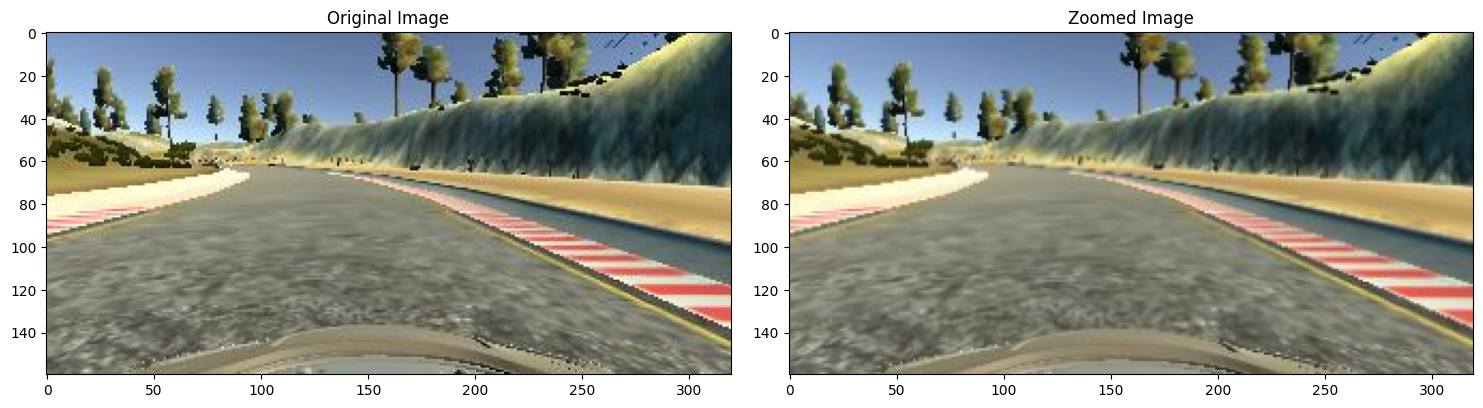

In [18]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(zoomed_image)
axes[1].set_title("Zoomed Image")

In [19]:
def pan(image) : 
    pan = augmenters.Affine(translate_percent={"x":(-0.1, 0.1), "y" : (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

Text(0.5, 1.0, 'Panned Image')

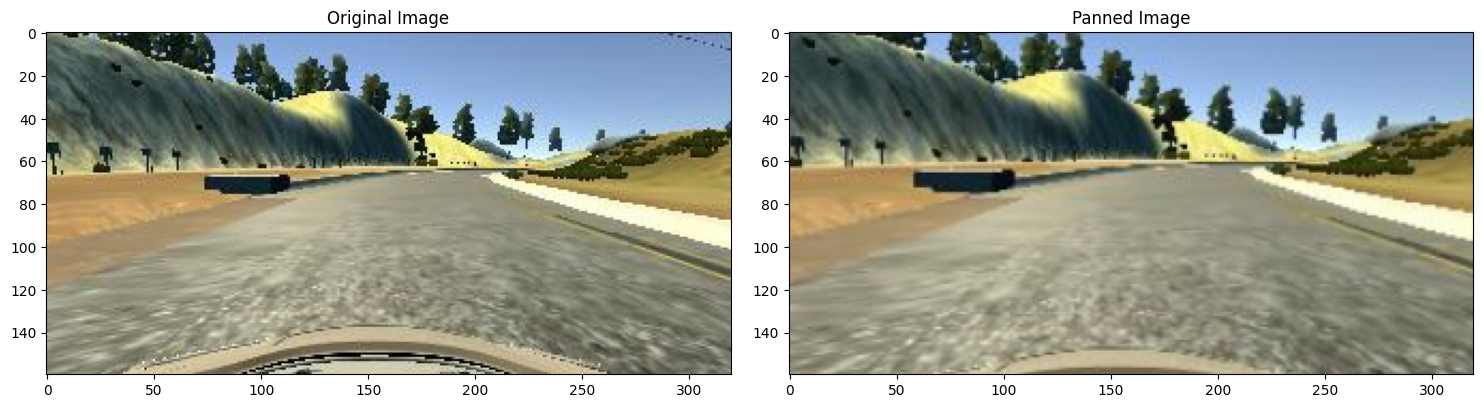

In [20]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(zoomed_image)
axes[1].set_title("Panned Image")

In [21]:
def img_random_brightness(image) :
    brightness = augmenters.Multiply((0.1, 1.2))
    brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Increased Brightness Image')

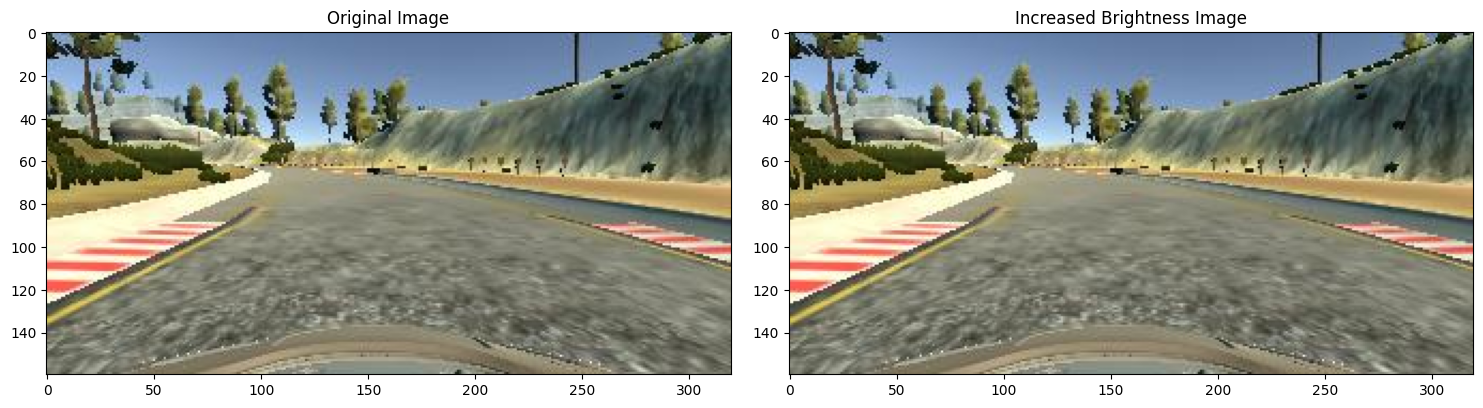

In [22]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = img_random_brightness(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(zoomed_image)
axes[1].set_title("Increased Brightness Image")

In [23]:
def img_random_flip(image, steering_angle) :
    image = cv2.flip(image, 1) # 0 -> vertical, 1 -> horizontal
    return image, -steering_angle

Text(0.5, 1.0, 'Flipped Image')

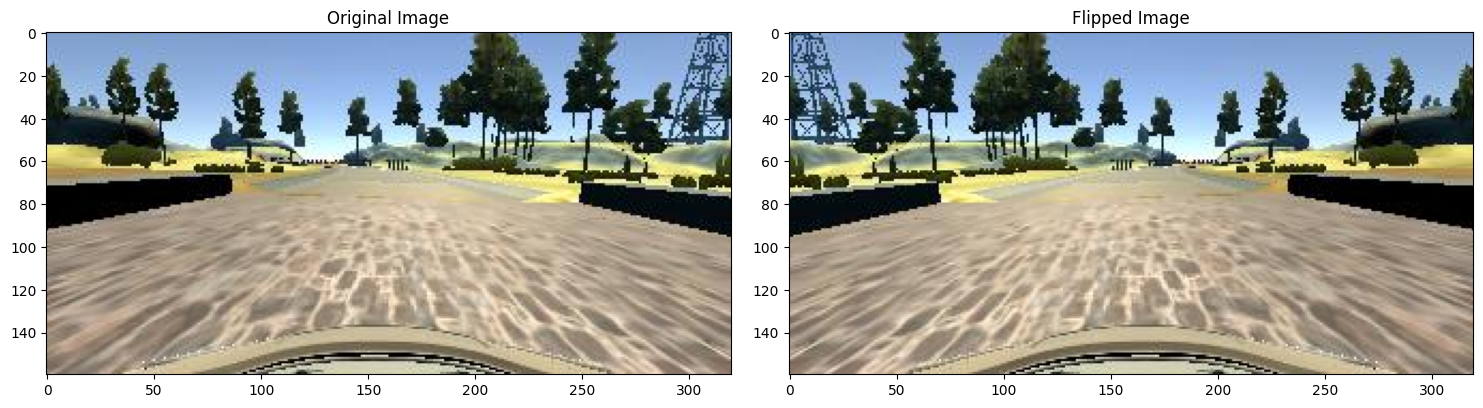

In [24]:
selected_index = random.randint(0, 1000)
image = image_paths[selected_index]
steering_angle = steerings[selected_index]
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(flipped_image)
axes[1].set_title("Flipped Image")

In [25]:
def random_augment(image, steering_angle) :
    image = mpimg.imread(image)

    if np.random.rand() < 0.5 :
        image = zoom(image)
    
    if np.random.rand() < 0.5 :
        image = pan(image)
    
    if np.random.rand() < 0.5 :
        image = img_random_brightness(image)
    
    if np.random.rand() < 0.5 :
        image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

## Preprocess the image

In [26]:
def img_preprocess(img) :
    
    # image -> (height, width, number of channels)
    img = img[60:135, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    # normalization
    img = img/255
    return img


In [27]:
def batch_generator(image_paths, steering_angle, batch_size, isTraining) :
    while True : 
        batch_img = []
        batch_steering = []
        for i in range(batch_size) :
            random_index = random.randint(0, len(image_paths) - 1)

            if isTraining : 
                img, steering = random_augment(image_paths[random_index], steering_angle[random_index])
            else :
                img = mpimg.imread(image_paths[random_index])
                steering = steering_angle[random_index]
            im = img_preprocess(img)
            batch_img.append(im)
            batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))

In [28]:
X_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
X_test_gen, y_test_gen = next(batch_generator(X_test, y_test, 1, 0))

Text(0.5, 1.0, 'Transformed image')

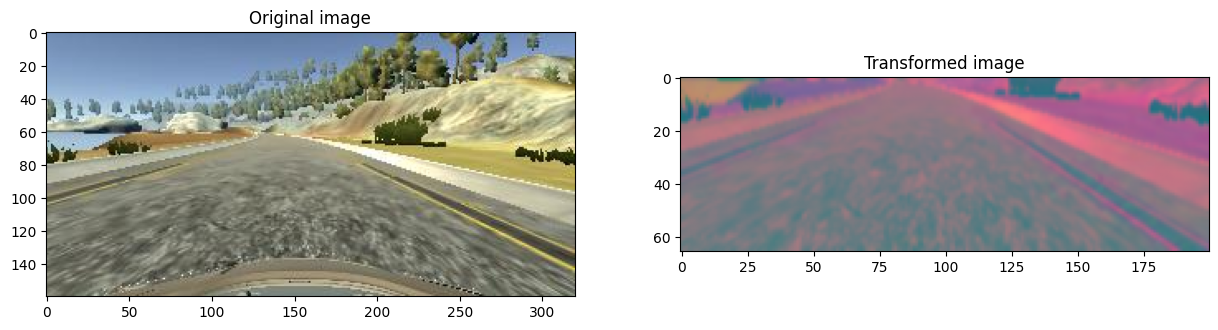

In [29]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(original_image)
axes[0].set_title("Original image")
axes[1].imshow(preprocessed_image)
axes[1].set_title("Transformed image")

In [30]:
X_train

array(['track/IMG\\center_2018_07_16_17_15_13_804.jpg',
       'track/IMG\\center_2018_07_16_17_13_51_581.jpg',
       'track/IMG\\center_2018_07_16_17_11_47_988.jpg',
       'track/IMG\\center_2018_07_16_17_13_03_849.jpg',
       'track/IMG\\center_2018_07_16_17_12_29_116.jpg',
       'track/IMG\\center_2018_07_16_17_12_24_289.jpg',
       'track/IMG\\center_2018_07_16_17_14_17_114.jpg',
       'track/IMG\\center_2018_07_16_17_12_44_006.jpg',
       'track/IMG\\center_2018_07_16_17_13_49_028.jpg',
       'track/IMG\\center_2018_07_16_17_13_34_314.jpg',
       'track/IMG\\center_2018_07_16_17_12_25_011.jpg',
       'track/IMG\\center_2018_07_16_17_13_18_985.jpg',
       'track/IMG\\center_2018_07_16_17_15_35_922.jpg',
       'track/IMG\\center_2018_07_16_17_12_11_965.jpg',
       'track/IMG\\center_2018_07_16_17_15_06_760.jpg',
       'track/IMG\\center_2018_07_16_17_11_45_333.jpg',
       'track/IMG\\center_2018_07_16_17_11_59_826.jpg',
       'track/IMG\\center_2018_07_16_17_13_38_19

In [31]:
# X_train = np.array(list(map(img_preprocess, X_train)))
# X_test = np.array(list(map(img_preprocess, X_test)))

In [32]:
# plt.imshow(X_train[3])

## Using NVIDIA Model

In [33]:
def lr_schedule(epoch):
    """Learning Rate Schedule"""
    return 0.001 * 0.9 ** epoch

def nvidia_model():
    model = Sequential()
    
    model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation="relu", kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(36, (5, 5), strides=(2, 2), activation="relu", kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(48, (5, 5), strides=(2, 2), activation="relu", kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    
    model.add(Dense(100, activation="relu", kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))  
    
    model.add(Dense(50, activation="relu", kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))  
    
    model.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
    model.add(BatchNormalization())
    
    model.add(Dense(1))
    
    model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

    return model

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

m = nvidia_model()
m.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 batch_normalization (Batch  (None, 31, 98, 24)        96        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 47, 36)        144       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 batch_normalization_2 (Bat  (None, 5, 22, 48)        

In [34]:
history = m.fit_generator(batch_generator(X_train, y_train, 100, 1), steps_per_epoch=300, epochs=10, validation_data=batch_generator(X_test, y_test, 100, 1), validation_steps=200, verbose=1)

C:\Users\Bryan wansen\AppData\Local\Temp\ipykernel_3892\3345848191.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = m.fit_generator(batch_generator(X_train, y_train, 100, 1), steps_per_epoch=300, epochs=10, validation_data=batch_generator(X_test, y_test, 100, 1), validation_steps=200, verbose=1)


Epoch 1/10

300/300 [==============================] - 120s 392ms/step - loss: 0.2662 - val_loss: 0.1383
Epoch 2/10
300/300 [==============================] - 118s 396ms/step - loss: 0.0791 - val_loss: 0.0673
Epoch 3/10
300/300 [==============================] - 118s 395ms/step - loss: 0.0575 - val_loss: 0.0495
Epoch 4/10
300/300 [==============================] - 118s 393ms/step - loss: 0.0495 - val_loss: 0.0496
Epoch 5/10
300/300 [==============================] - 116s 389ms/step - loss: 0.0434 - val_loss: 0.0461
Epoch 6/10
300/300 [==============================] - 116s 387ms/step - loss: 0.0402 - val_loss: 0.0418
Epoch 7/10
300/300 [==============================] - 111s 372ms/step - loss: 0.0365 - val_loss: 0.0417
Epoch 8/10
300/300 [==============================] - 111s 373ms/step - loss: 0.0341 - val_loss: 0.0352
Epoch 9/10
300/300 [==============================] - 110s 366ms/step - loss: 0.0320 - val_loss: 0.0361
Epoch 10/10
300/300 [==============================] - 110s 367

Text(0.5, 0, 'Epoch')

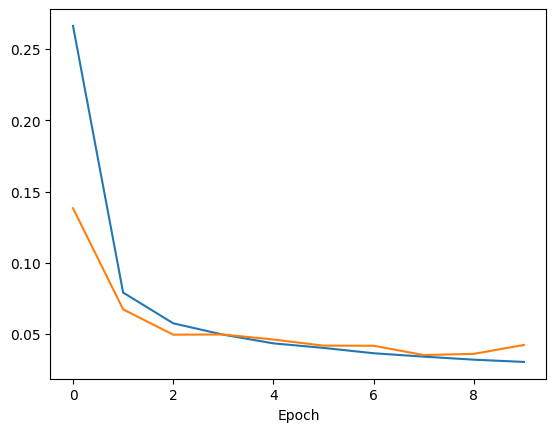

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")

In [36]:
m.save("self_driving_car_newest_1.h5")

c:\Users\Bryan wansen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Image Augmentation

In [37]:
def zoom(image) :
    zoom = augmenters.Affline(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

In [38]:
image = image_paths[0]